In [149]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
import pandas as pd

global local_dir
global z_bin
global qlor
global lbl

local_dir = "/home/colgoat/TFPS"
#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
#num = Number of redshift bins to be plotted
#ini = Starter plotting bin
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]
qlor = ["magenta","red","blue","black","lime","orange","cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
lbl = ["z = 2.2","z = 2.4","z = 2.6","z = 2.8","z = 3.0","z = 3.2","z = 3.4","z = 3.6","z = 3.8","z = 4.0","z = 4.2","z = 4.4","z = 4.6"]


In [150]:
def plotter_single(n,ini,fin,pha,mark,ms,ls):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
        
    local_file = os.path.join(local_dir,n)
    PS=Table.read(local_file)


    plt.rcParams["figure.figsize"] = [18, 12]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['font.size'] = '16'

    bines = fin - ini
    
    
    for a in range(bines):
        binZ = (PS['zbin'] == z_bin[ini+a])
        pl = PS[binZ]
        k = pl['meank']
        P = (pl['meanPk'] *  pl['meank'])/np.pi
        er = (pl['errorPk'] *  pl['meank'])/np.pi
        
        plt.errorbar(k , P , yerr = er, marker = mark, label = lbl[ini+a], 
                     markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        
        
    plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    plt.title(f'Transmitted Flux Power Spectrum {n}', size = 30)
    plt.show()

In [151]:
def plotter_compar(N,ini,fin):
    
    while (fin>13):
        fin = input('Must be major 13:')
        fin = int(fin)
        
    bines = fin - ini
    plt.rcParams["figure.figsize"] = [18, 12]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['font.size'] = '16'
    
    loop1 = ['o','*','s','^','d']
    loop2 = ['-',':','--','-.','-']
    
    name = []
    
    for x in range(N):
        
        n = input(f'Name of file {x+1} on disk:')
        par_ask = input(f'Default parameters?(1/0)')
        par_ask = int(par_ask)
        
        name.append(n)
        
        if (par_ask == 1):
            mark = loop1[x]
            ms = 10
            pha = 0.7
            ls = loop2[x]
        else:
            print(f'For {x+1}:')
            mark = input('Marker:')
            ms = input('Markersize:')
            ms = int(ms)
            pha = input('Alpha:')
            pha = float(pha)
            ls = input('Linestyle:')
            
        local_file = os.path.join(local_dir,n)
        PS=Table.read(local_file)
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
            plt.errorbar(k , P , yerr = er, marker = mark, label = lbl[ini+a],
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        
    plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    
    ax.legend(lbl[ini:fin]
              ,loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=5, fontsize = 20)
    plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    
        
    
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    
    
    textstr = '\n'.join('\n')
    
    for v in range(N):
        if (loop1[v] == 'o'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\bullet$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == '*'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\star$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == 's'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\boxdot$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == '^'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\blacktriangle$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == 'd'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\diamond$' +'] ' + str(name[v]) + '\n'
            
        
    
    
    ax.text(0.05,0.95,textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox= props)
    
    plt.title(f'Transmitted Flux Power Spectrum comparison', size = 30)
    plt.show()

In [152]:
def compar_singlebin2(n1,n2,ini):
    
    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
        
    local_file1 = os.path.join(local_dir,n1)
    PS1=Table.read(local_file1)
    
    local_file2 = os.path.join(local_dir,n2)
    PS2=Table.read(local_file2)
        
    binZ1 = (PS1['zbin'] == z_bin[ini])
    pl1 = PS1[binZ1]
    k1 = pl1['meank']
    P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
    er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
    fu_1 = ((er1)) + (P1)
    fl_1 = (P1) - ((er1))
    
    binZ2 = (PS2['zbin'] == z_bin[ini])
    pl2 = PS2[binZ2]
    k2 = pl2['meank']
    P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
    er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
    fu_2 = ((er2)) + (P2)
    fl_2 = (P2) - ((er2))
    
    EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
    
    fig, axs = plt.subplots(2,1,figsize=(18,12), gridspec_kw={'height_ratios': [2, 0.5]})
    
    axs[0].errorbar(k1,P1,yerr = er1, marker = 's', label = "bin z = "+str(z_bin[ini])+"  "+str(n1), markersize = 7,\
        color = qlor[ini], alpha = 0.6, mec ='k', linestyle = "--")
    axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1,label = 'Error coverage ' + str(n1))
    
    axs[0].errorbar(k2,P2,yerr = er2, marker = 'o', label = "bin z = "+str(z_bin[ini])+"  "+str(n2), markersize = 8, \
        color = qlor[ini], alpha = 0.7, mec ='k', linestyle = "-")
    axs[0].fill_between(k2,fu_2,fl_2, alpha = 0.1,label = 'Error coverage '+ str(n2))
    
    
    axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
    axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[0].legend(loc='upper left')
    axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    
    axs[1].plot(k1,EP, marker = 'o', markersize = 8,color = qlor[ini], alpha = 0.7, mec ='k')
    axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    axs[1].set_ylabel('% diff', size = 30)
    axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)

In [153]:
def p1d_HQv(n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
    
    local_file = os.path.join(local_dir,n)
    p1d_file = pyfits.open(local_file)
    PS = Table.read(p1d_file[1])
    chunks = Table.read(p1d_file[2])

    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams["figure.figsize"] = [19, 10]
    plt.rcParams["figure.autolayout"] = True

    plt.figure(figsize=(w,h),dpi=int(DPI))

    bines = fin - ini
    
    PROJECT = np.char.find(n, "DESI", start=0, end=None)
    
    if (PROJECT<0):
        
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
        
            plt.errorbar(k , P , yerr = er, marker = mark, 
                         label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
                        
        
        
        plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
                   family = 'serif', size = AlS)          
        plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = AlS)
        plt.yscale('log')
        plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=Nc, fontsize = LS)
        plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.title(f'Transmitted Flux Power Spectrum (P1D) {str(survey)} quasar sample', weight='semibold',
                  style= 'normal', family = 'serif', size =TS)
        plt.show()
        
    else:
        
        cut = np.array([45,48,51,54,57,60,63,66,69,72,75,78,81,84])
        
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
            k = k[0:cut[a]+1]
            P = P[0:cut[a]+1]
            er = er[0:cut[a]+1]
            
            plt.errorbar(k , P , yerr = er, marker = mark, 
                         label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
                        
        
        
        plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
                   family = 'serif', size = AlS)          
        plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = AlS)
        plt.yscale('log')
        plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=Nc, fontsize = LS)
        plt.xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040],fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.title(f'Transmitted Flux Power Spectrum (P1D) {str(survey)} quasar sample', weight='semibold',
                  style= 'normal', family = 'serif', size =TS)
        plt.show()

In [154]:
def p1d_HQl(n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
        
    local_file = os.path.join(local_dir,n)
    p1d_file = pyfits.open(local_file)
    PS = Table.read(p1d_file[1])
    chunks = Table.read(p1d_file[2])


    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams["figure.figsize"] = [19, 10]
    plt.rcParams["figure.autolayout"] = True

    plt.figure(figsize=(w,h),dpi=int(DPI))

    bines = fin - ini
    
    
    for a in range(bines):
        binZ = (PS['zbin'] == z_bin[ini+a])
        pl = PS[binZ]
        k = pl['meank']
        P = (pl['meanPk'] *  pl['meank'])/np.pi
        er = (pl['errorPk'] *  pl['meank'])/np.pi
        plt.errorbar(k , P , yerr = er, marker = mark,  
                     label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                     markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = AlS)
    plt.xlabel('$\overline{k}$ $(\AA^{-1})$',style = 'oblique', family = 'serif', size = AlS)
    plt.yscale('log')
    plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=Nc, fontsize = LS)
    plt.xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0],fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(f'Transmitted Flux Power Spectrum {str(survey)} sample', weight='semibold', 
                style= 'normal', family = 'serif', size =TS)
    plt.show()

In [209]:
def error_compar2(n1,n2,ini,fin,Hr1,Hr2,Wf,Hf,title1,title2):

    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
         
    local_file1 = os.path.join(local_dir,n1)
    p1d_file1 = pyfits.open(local_file1)
    PS1 = Table.read(p1d_file1[1])
    chunks1 = Table.read(p1d_file1[2])
    
    local_file2 = os.path.join(local_dir,n2)
    p1d_file2 = pyfits.open(local_file2)
    PS2 = Table.read(p1d_file2[1])
    chunks2 = Table.read(p1d_file2[2])
    
    
    bines = fin - ini
    
    
    fig, axs = plt.subplots(2,1,figsize=(Wf,Hf), gridspec_kw={'height_ratios': [Hr1, Hr2]})
    
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        k1 = pl1['meank']
        P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
        er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
        fu_1 = ((er1)) + (P1)
        fl_1 = (P1) - ((er1))
        axs[0].errorbar(k1,P1,yerr = er1, marker = '*', 
                        label = lbl[ini+a]+' ('+str(int(chunks1['N_chunks'][a]))+ ' forests)',
                        markersize = 7,color = qlor[ini+a], alpha = 0.7, mec ='k', linestyle = "--") 
        axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1)
        
    for a in range(bines):
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        k2 = pl2['meank']
        P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
        er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
        fu_2 = ((er2)) + (P2)
        fl_2 = (P2) - ((er2))
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        
        axs[0].errorbar(k2,P2,yerr = er2, marker = 'o', 
                        label = lbl[ini+a]+' ('+str(int(chunks2['N_chunks'][a]))+ ' forests)',
                        markersize = 8, color = qlor[ini+a], alpha = 0.6, mec ='k', linestyle = "-")
        axs[0].fill_between(k2,fu_2,fl_2, alpha = 0.1)
    
    
    AVE_ERROR = []
        
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        ave_flab = np.mean(np.array(EP))
        axs[1].plot(k2,EP, marker = '.', markersize = 8,
                    color = qlor[ini+a], alpha = 0.7,
                    label = r'$\mu\sim$'+str(round(ave_flab,1)),mec ='k')
        AVE_ERROR.append(ave_flab)
        
    AVE_ERROR = np.array(AVE_ERROR)
    
    
    axs[0].set_title(f'Transmitted Flux Power Spectrum comparison', weight='semibold', 
                style= 'normal', family = 'serif', size =30)
    
    axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
    axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    axs[0].set_yscale('log')
    
    
    txt_prop = {'size' :13}
    txt_propT = {'style' : 'normal', 'family' : 'serif', 'size' :13, 'weight':'semibold'}
    
    
    B = r'[$\bullet$]'
    S = r'[$\star$]'
    
    axs[0].legend(loc = 'lower right', ncol= 4, prop = txt_prop,
                  title_fontproperties=txt_propT,
                  title=f'{B} {title1} | {B} {title2}')

    
    
    

    axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    axs[1].set_ylabel('% diff', size = 30)
    axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[1].legend(loc = 'upper center', ncol=7, fontsize = 15)
    plt.title(f'Percentage ratio', size = 30)
    print(np.mean(AVE_ERROR))

In [156]:
def systematics(n1,n2,ini,fin,Hr1,Hr2,Wf,Hf,title):

    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
        
    local_file1 = os.path.join(local_dir,n1)
    PS1=Table.read(local_file1)
    
    print(n1)
    bines = fin - ini
    
    fig, axs = plt.subplots(len(n2),1,figsize=(Wf,Hf),gridspec_kw={'hspace':0.3})#, gridspec_kw={'height_ratios': [Hr1, Hr2]}
    
    marks = ['o','*','s']
    
  
    for h in range(len(n2)):
        
        print(n2[h])
        local_file2 = os.path.join(local_dir,n2[h])
        PS2=Table.read(local_file2)
        
        if ((np.char.find(n2[h], "DLA", start=0, end=None))>=0):
            budget_name = "Whitout corrections of DLA systems"
        elif ((np.char.find(n2[h], "BAL", start=0, end=None))>=0):
            budget_name = "Including BAL quasars"
        elif ((np.char.find(n2[h], "Sky", start=0, end=None))>=0):
            budget_name = "Whitout SkyLines correction"
        
        
        for a in range(bines):
            binZ1 = (PS1['zbin'] == z_bin[ini+a])
            pl1 = PS1[binZ1]
            k1 = pl1['meank']
            P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
            er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
            fu_1 = ((er1)) + (P1)
            fl_1 = (P1) - ((er1))
            
            binZ2 = (PS2['zbin'] == z_bin[ini+a])
            pl2 = PS2[binZ2]
            k2 = pl2['meank']
            P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
            er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
            fu_2 = ((er2)) + (P2)
            fl_2 = (P2) - ((er2))
            EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
            
            axs[h].plot(k2,EP, marker = marks[h], markersize = 8,color = qlor[ini+a], alpha = 0.7, mec ='k')
            
        
        axs[h].set_ylabel('% diff', size = 30)
        axs[h].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
        axs[h].set_title(f'{budget_name}', size = 30)
        txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :10}
        axs[h].legend(lbl[ini:fin],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, prop = txt_prop)
            
        #if(h==0):
            #axs[h].legend(lbl[ini:fin],bbox_to_anchor=(0.0, 1.05), ncol=bines/2, fontsize = 15)
        if (h==2):
            if (((np.char.find(title, "ESI", start=0, end=None))>=0)):
                axs[h].set_xlabel('$\overline{k}$ $(\AA^{-1})$', size = 30)
            else:
                axs[h].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
            
    fig.suptitle(f'Systematics budget for P1D from {title} sample', weight='semibold', 
                style= 'normal', family = 'serif', size =30)

4.1257521596443265


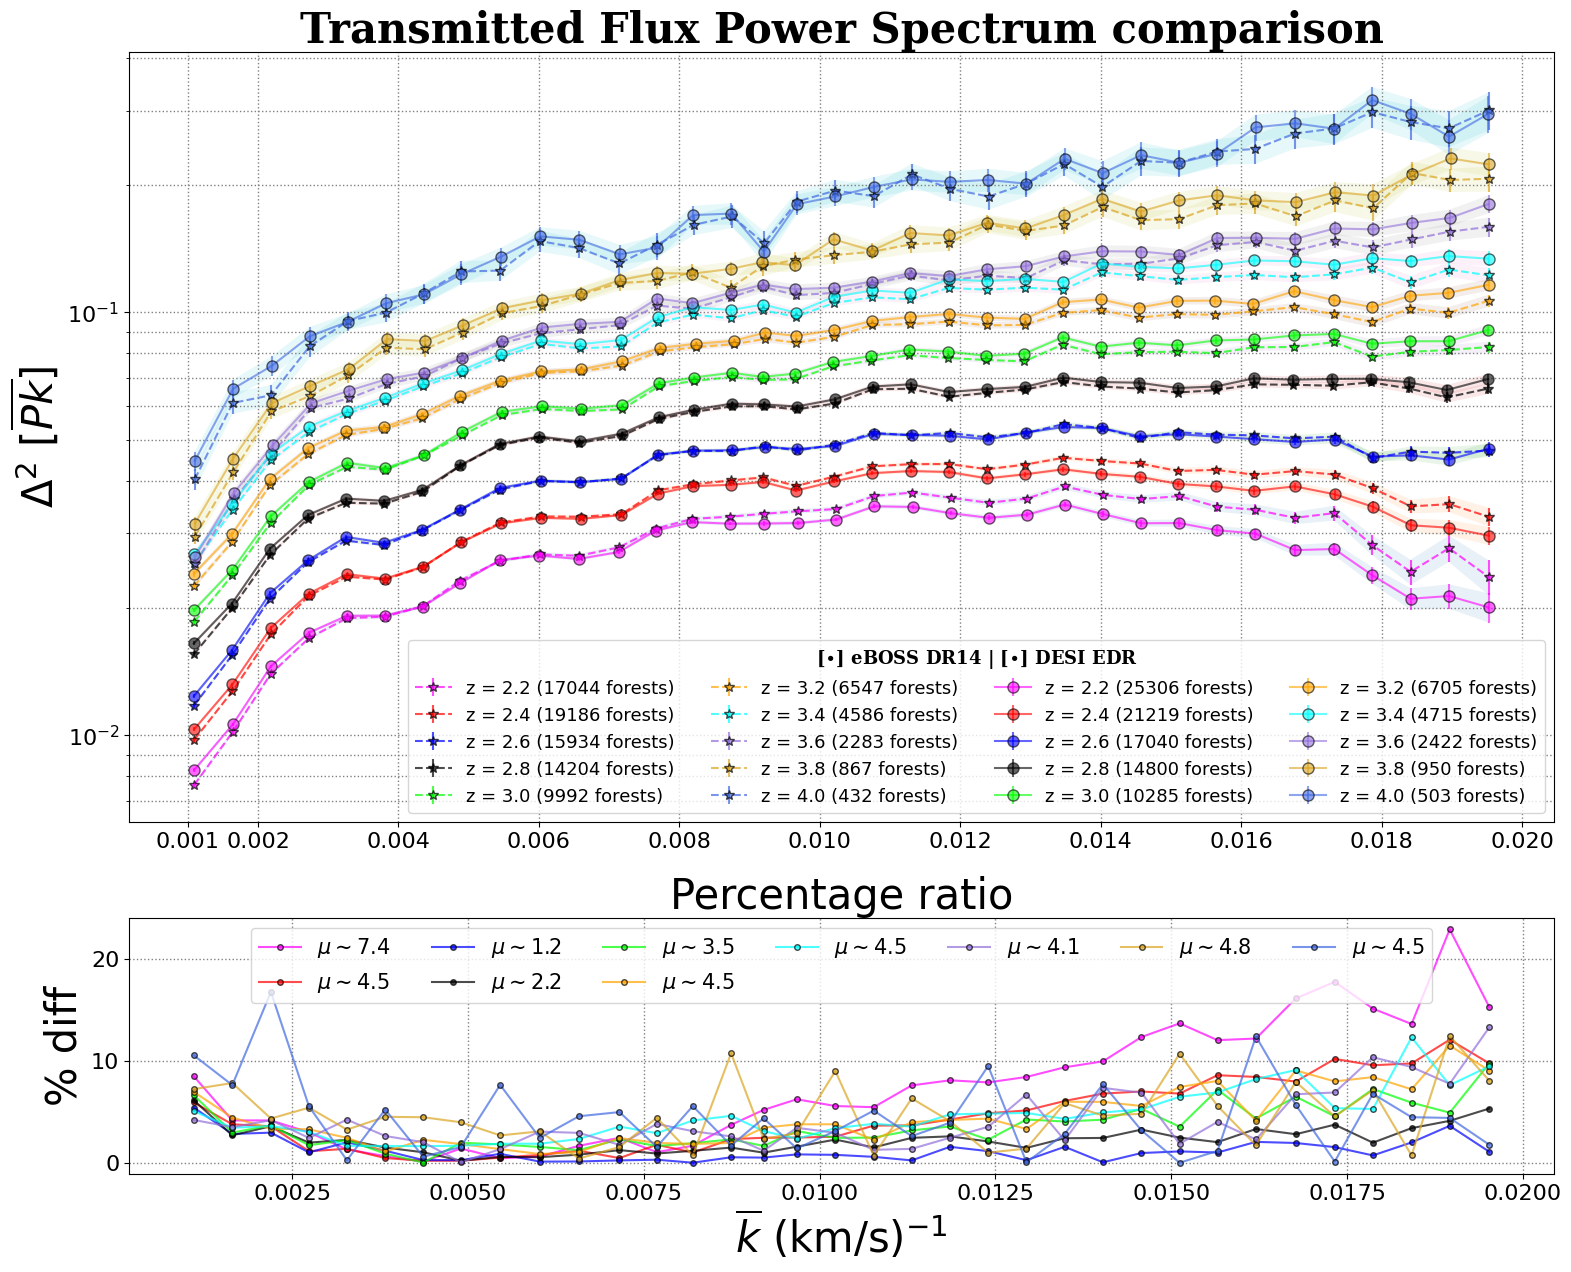

In [232]:
#P1D_eBOSS_Chabanier2019_results.fits


error_compar2('P1D_eBOSS_DR14_Standard-v4.fits.gz','P1D_eBOSS_DR16_Standard-v4.fits.gz',
              0,10,3,1,16,13,
              'eBOSS DR14','DESI EDR')

P1D_eBOSS_DR14_Standard-master.fits.gz
P1D_eBOSS_DR14_DLAnot_corrected.fits.gz
P1D_eBOSS_DR14_BALincluded.fits.gz
P1D_eBOSS_DR14_SkyLines_included.fits.gz


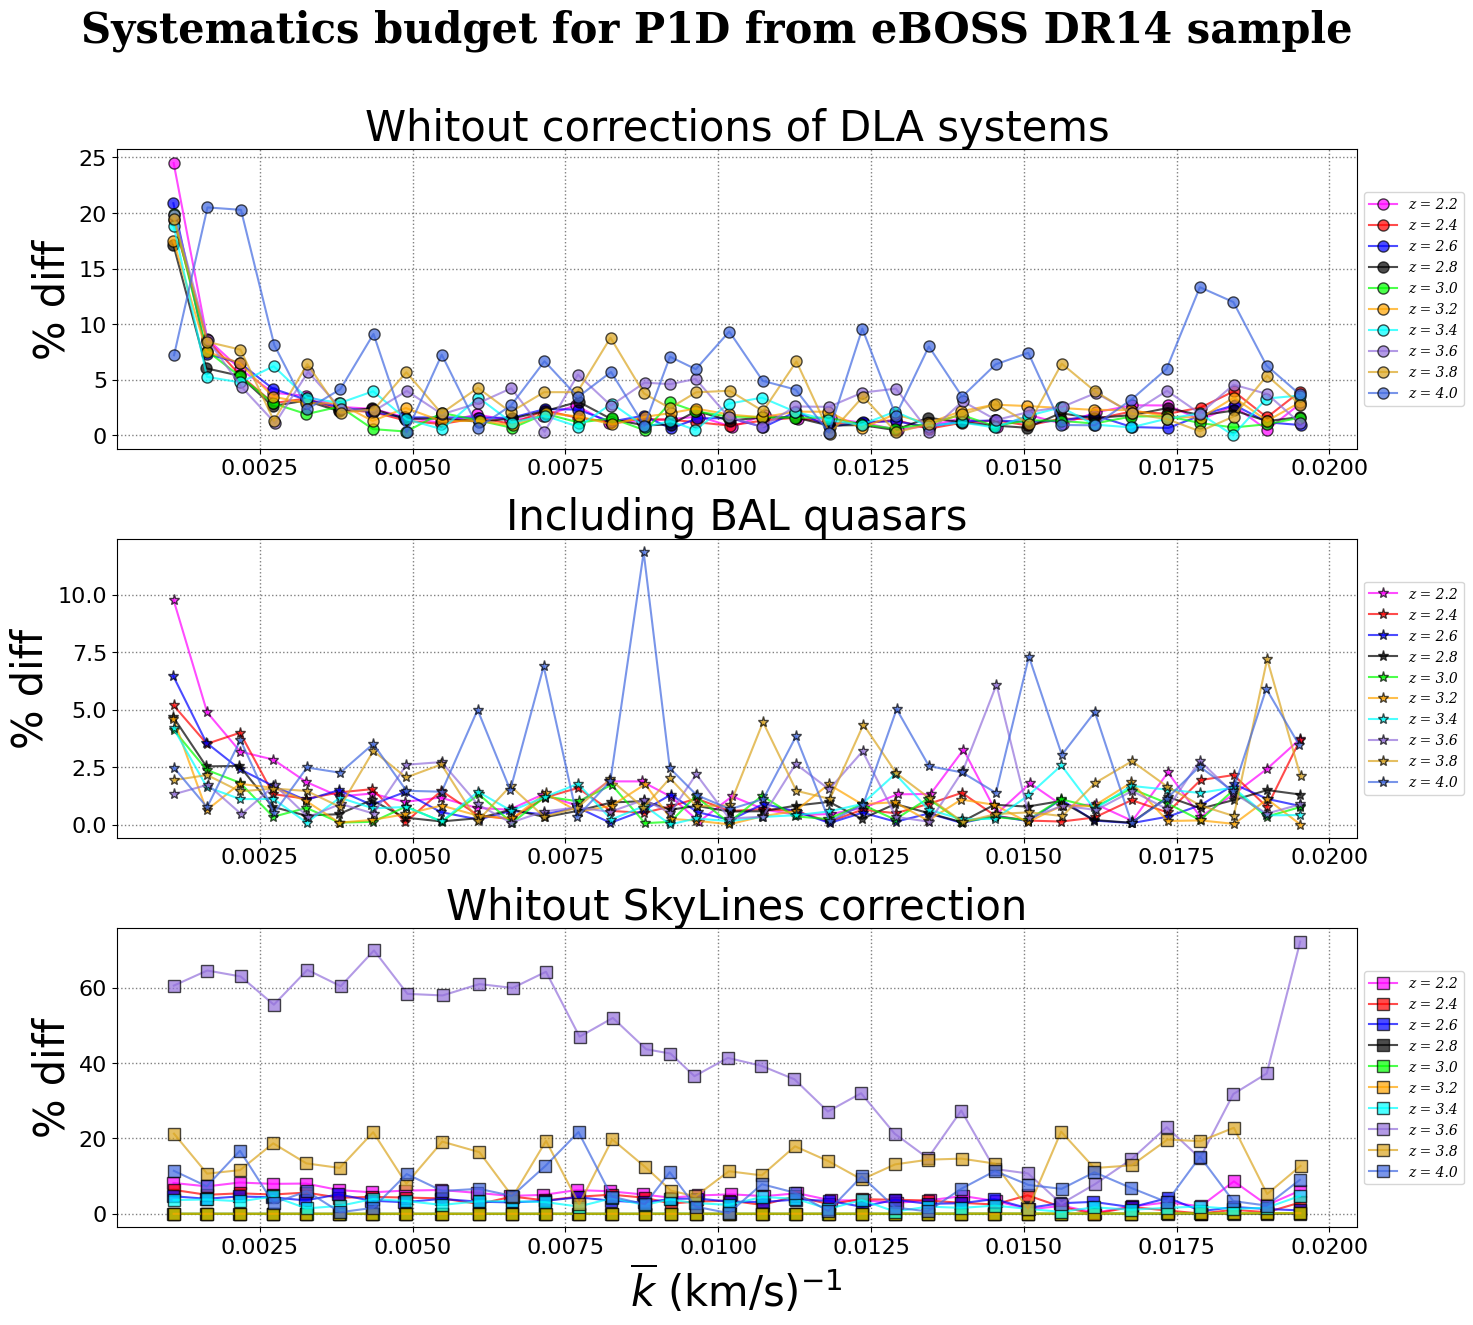

In [221]:
systematics('P1D_eBOSS_DR14_Standard-master.fits.gz',
                  ['P1D_eBOSS_DR14_DLAnot_corrected.fits.gz','P1D_eBOSS_DR14_BALincluded.fits.gz',
                   'P1D_eBOSS_DR14_SkyLines_included.fits.gz'],
                  0,10,3,1,16,14,'eBOSS DR14')

P1D_eBOSS_DR16_Standard-master.fits.gz
P1D_eBOSS_DR16_DLAnot_corrected.fits.gz
P1D_eBOSS_DR16_BALincluded.fits.gz
P1D_eBOSS_DR16_SkyLines_included.fits.gz


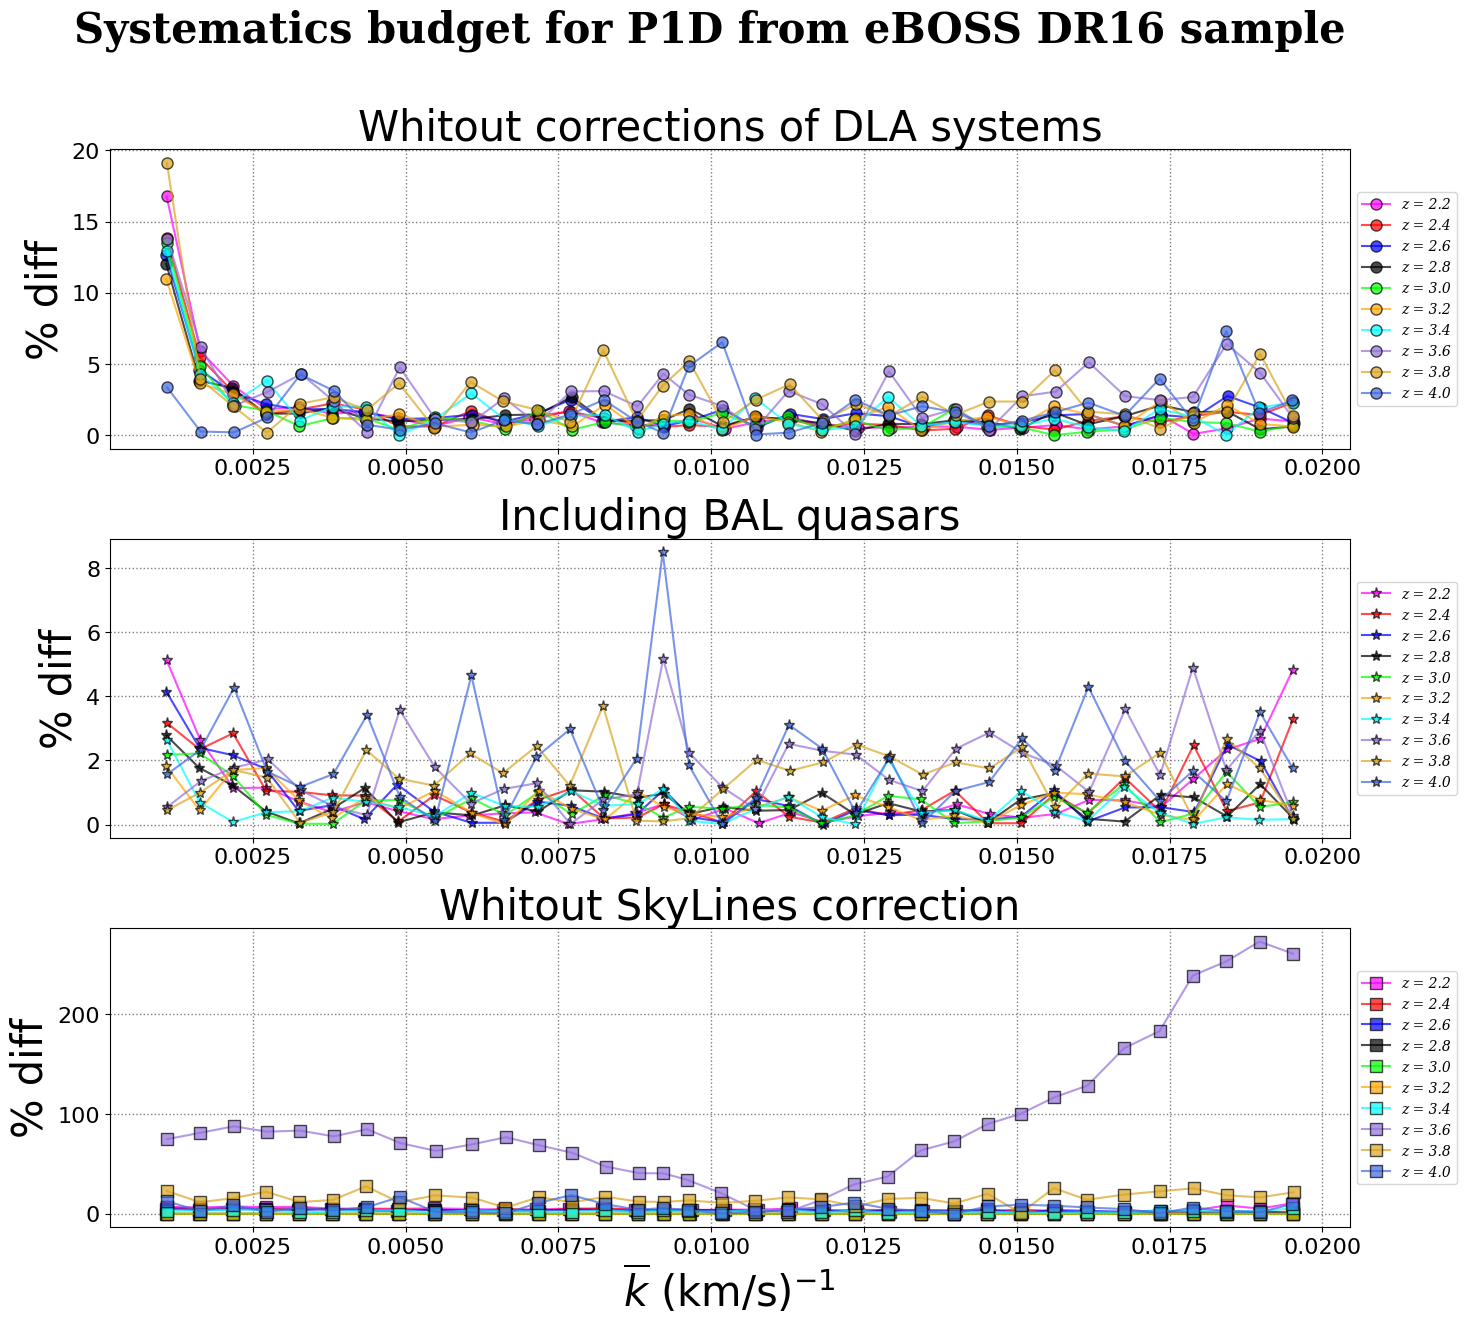

In [222]:
systematics('P1D_eBOSS_DR16_Standard-master.fits.gz',
                  ['P1D_eBOSS_DR16_DLAnot_corrected.fits.gz','P1D_eBOSS_DR16_BALincluded.fits.gz',
                   'P1D_eBOSS_DR16_SkyLines_included.fits.gz'],
                  0,10,3,1,16,14,'eBOSS DR16')

P1D_DESI_SV1-3_Standard_lambunits.fits.gz
P1D_DESI_SV1-3_BALincluded_lambunits.fits.gz
P1D_DESI_SV1-3_SkyLines_included_lambunits.fits.gz


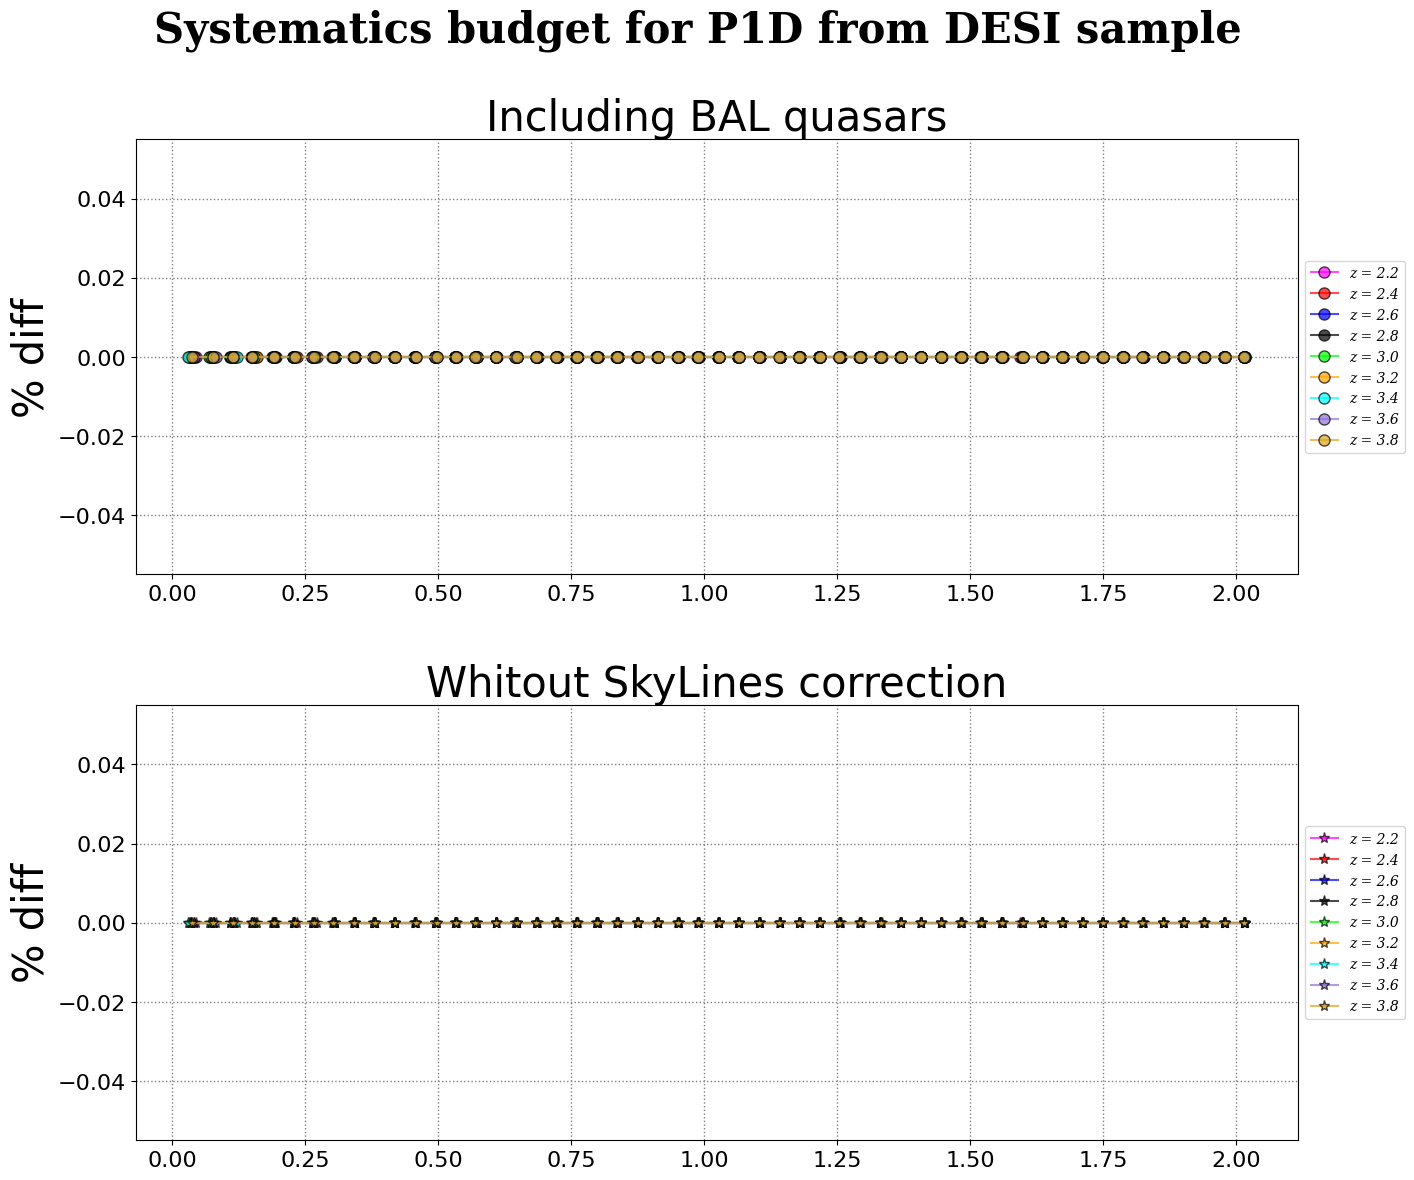

In [160]:
systematics('P1D_DESI_SV1-3_Standard_lambunits.fits.gz',
                  ['P1D_DESI_SV1-3_BALincluded_lambunits.fits.gz',
                   'P1D_DESI_SV1-3_SkyLines_included_lambunits.fits.gz'],
                  0,9,3,1,15,13,'DESI')

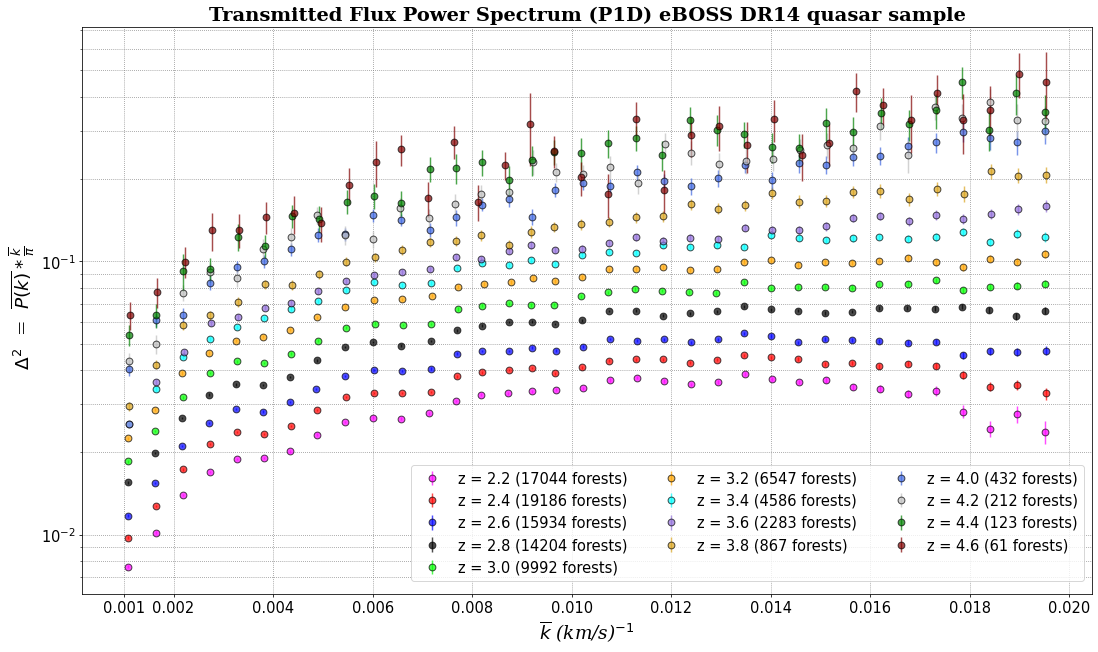

In [206]:
p1d_HQv('P1D_eBOSS_DR14_Standard-v4.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR14',70,16,9.6,19,15,20,3)

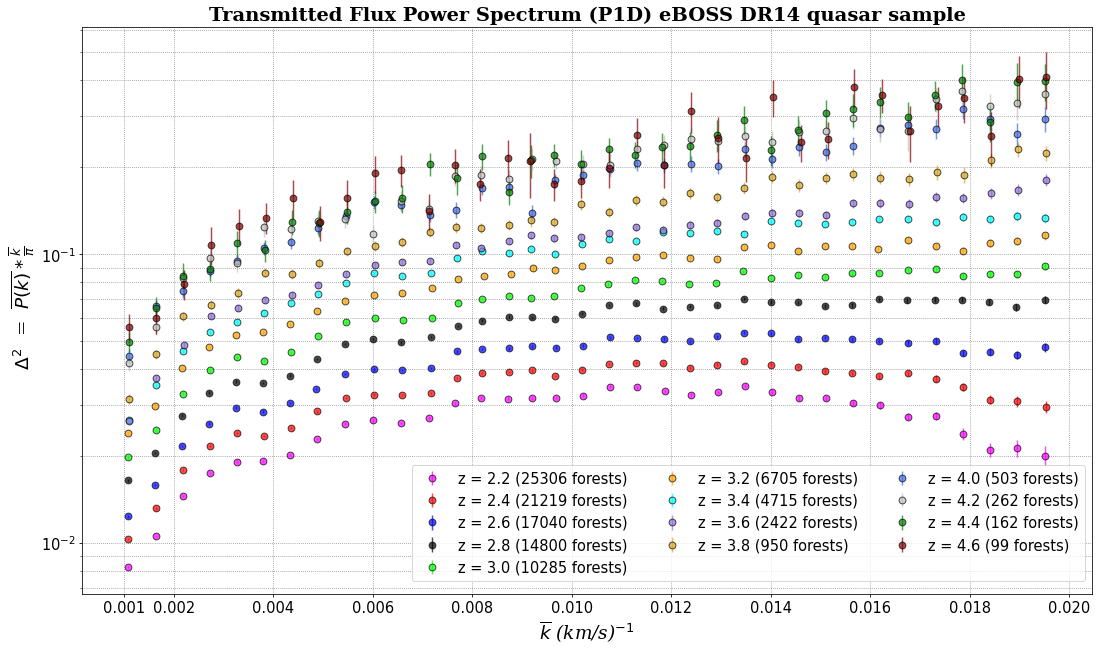

In [207]:
p1d_HQv('P1D_eBOSS_DR16_Standard-v4.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR14',70,16,9.6,19,15,20,3)

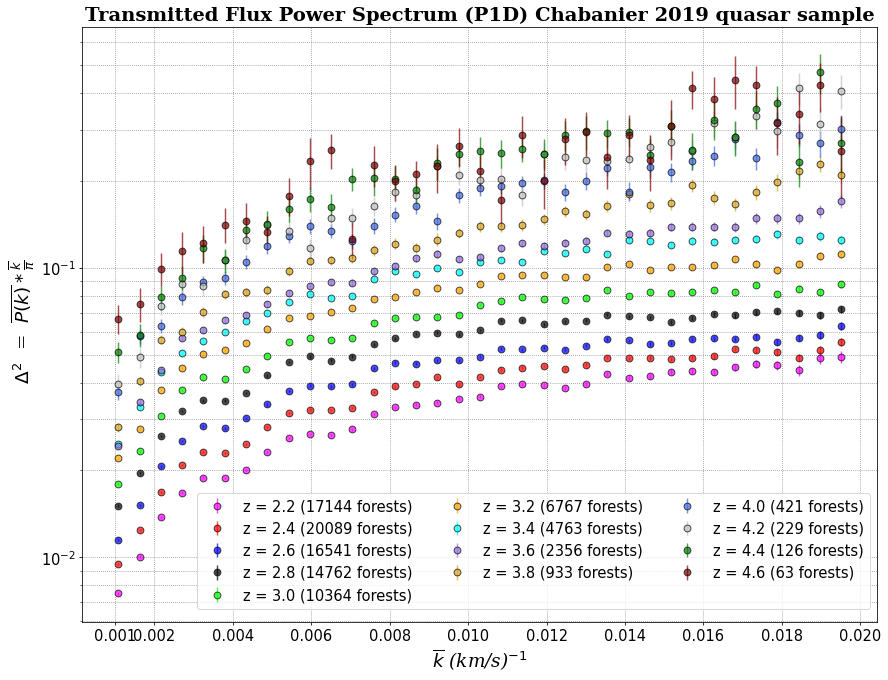

In [162]:
p1d_HQv('P1D_eBOSS_Chabanier2019_results.fits',0,13,0.7,'o',7,'none','Chabanier 2019',70,13,10,19,15,20,3)

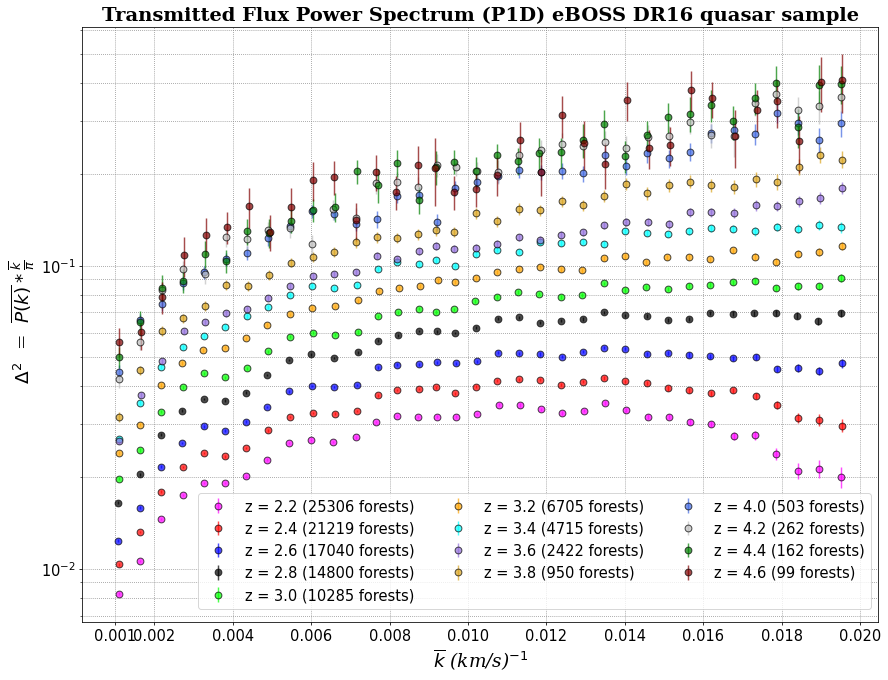

In [163]:
p1d_HQv('P1D_eBOSS_DR16_Standard-v4.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR16',70,13,10,19,15,20,3)

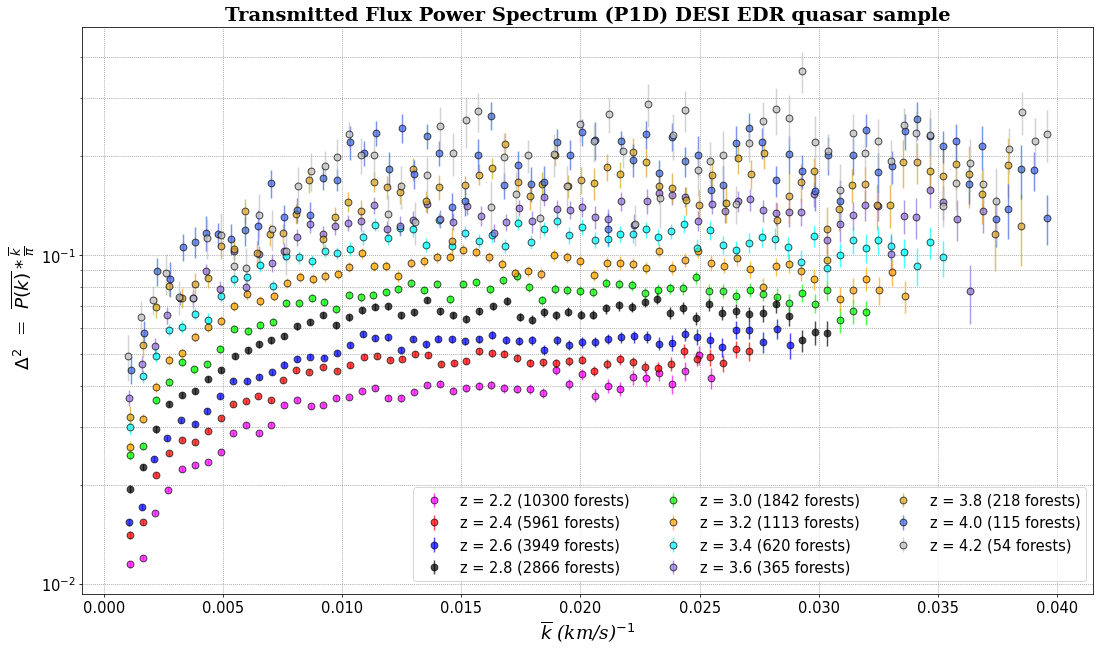

In [225]:
p1d_HQv('P1D_DESI_SV1-3_Standard_velunits_extended.fits.gz',0,11,0.7,'o',7,'none','DESI EDR',70,16,9.6,19,15,20,3)

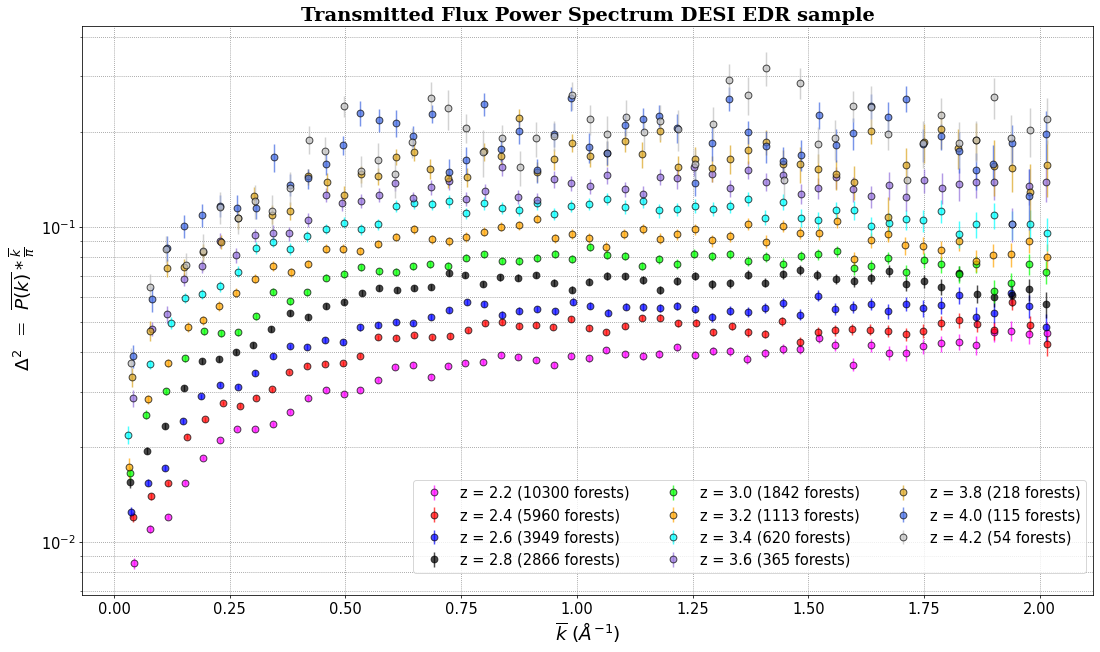

In [226]:
p1d_HQl('P1D_DESI_SV1-3_Standard_lambunits.fits.gz',0,11,0.7,'o',7,'none','DESI EDR',70,16,9.6,19,15,20,3)

Name of file 1 on disk:P1D_DESI_SV1-3_Standard_velunits.fits.gz
Default parameters?(1/0)1


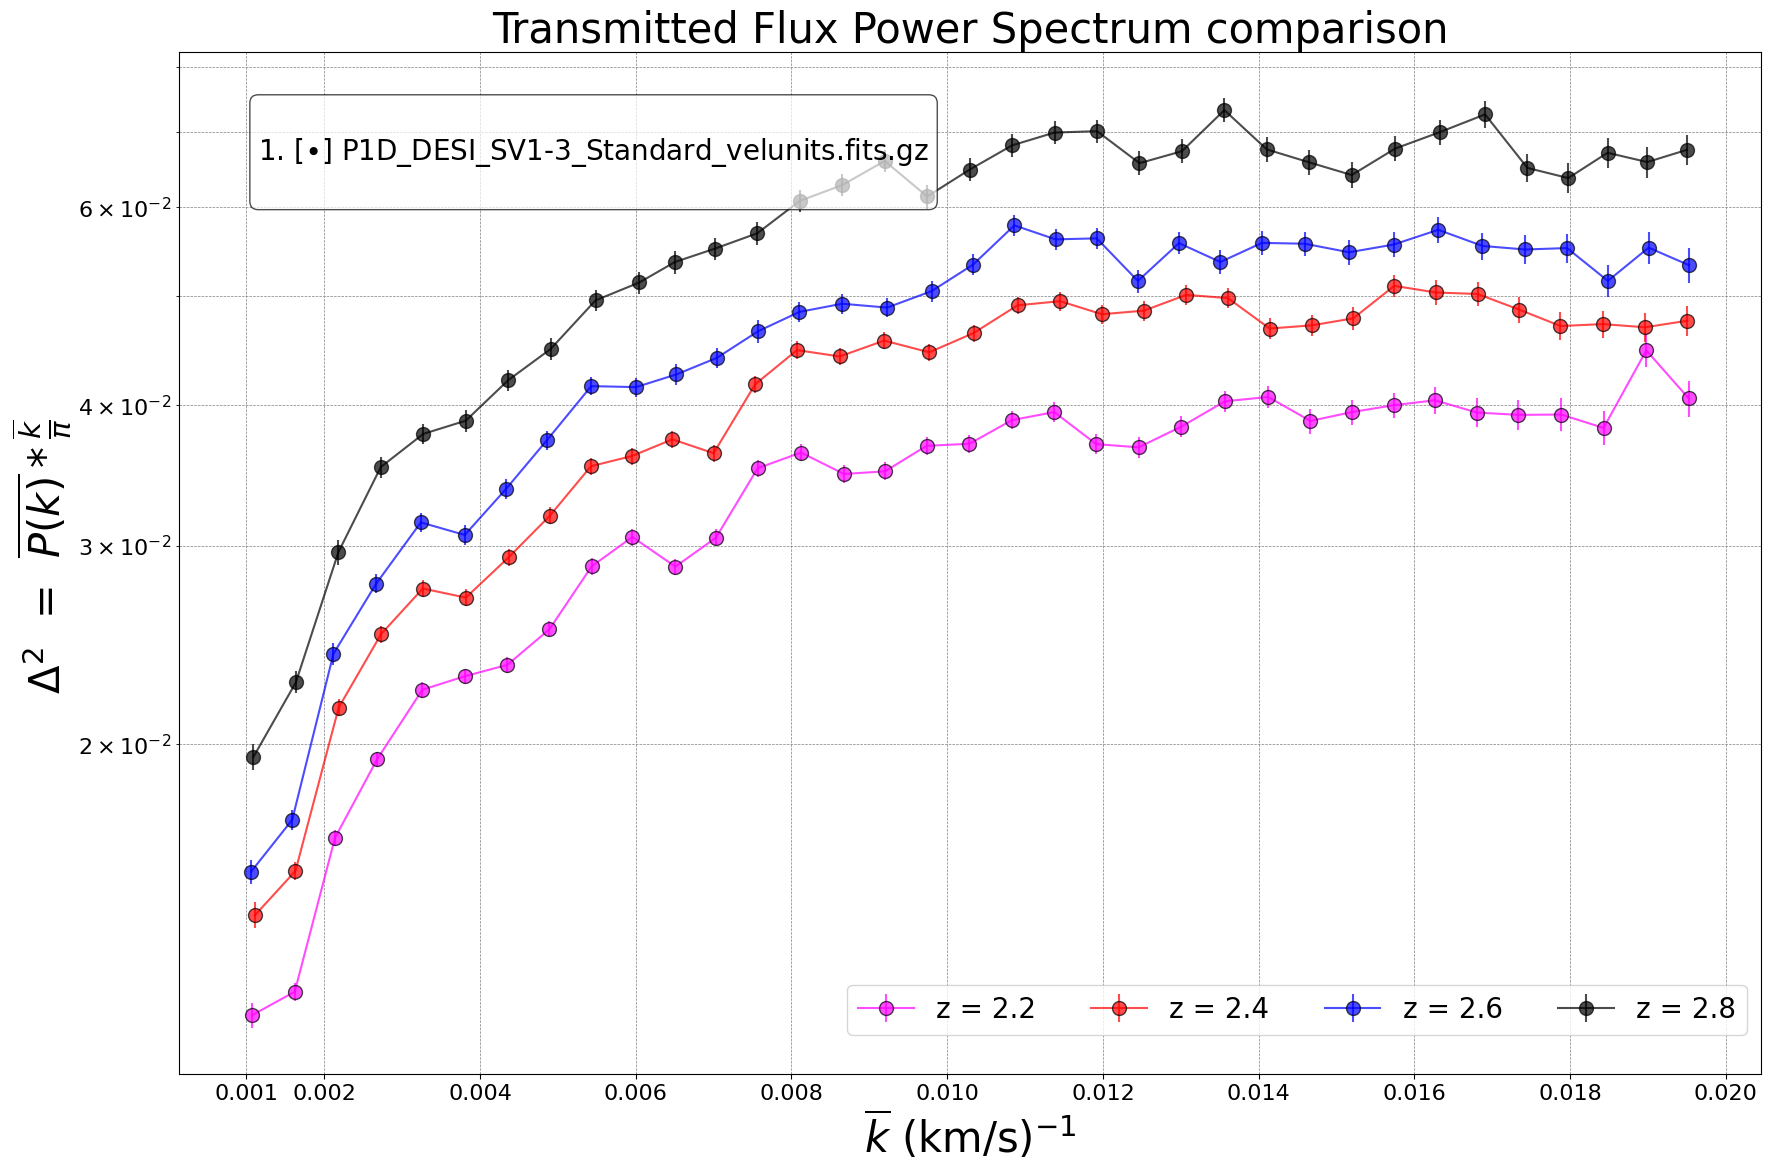

In [167]:
#P1D_DESI_SV1-3_Standard_velunits.fits.gz
#P1D_DESI_SV1-3_SkyLines_included_velunits.fits.gz
#P1D_DESI_SV1-3_BALincluded_velunits.fits.gz
#P1D_eBOSS_Chabanier2019_results.fits
#P1D_eBOSS_DR14_Standard-v4.fits.gz
#P1D_eBOSS_DR16_Standard-v4.fits.gz
#P1D_DESI_SV1-3_Standard_velunits.fits.gz

plotter_compar(1,0,4)

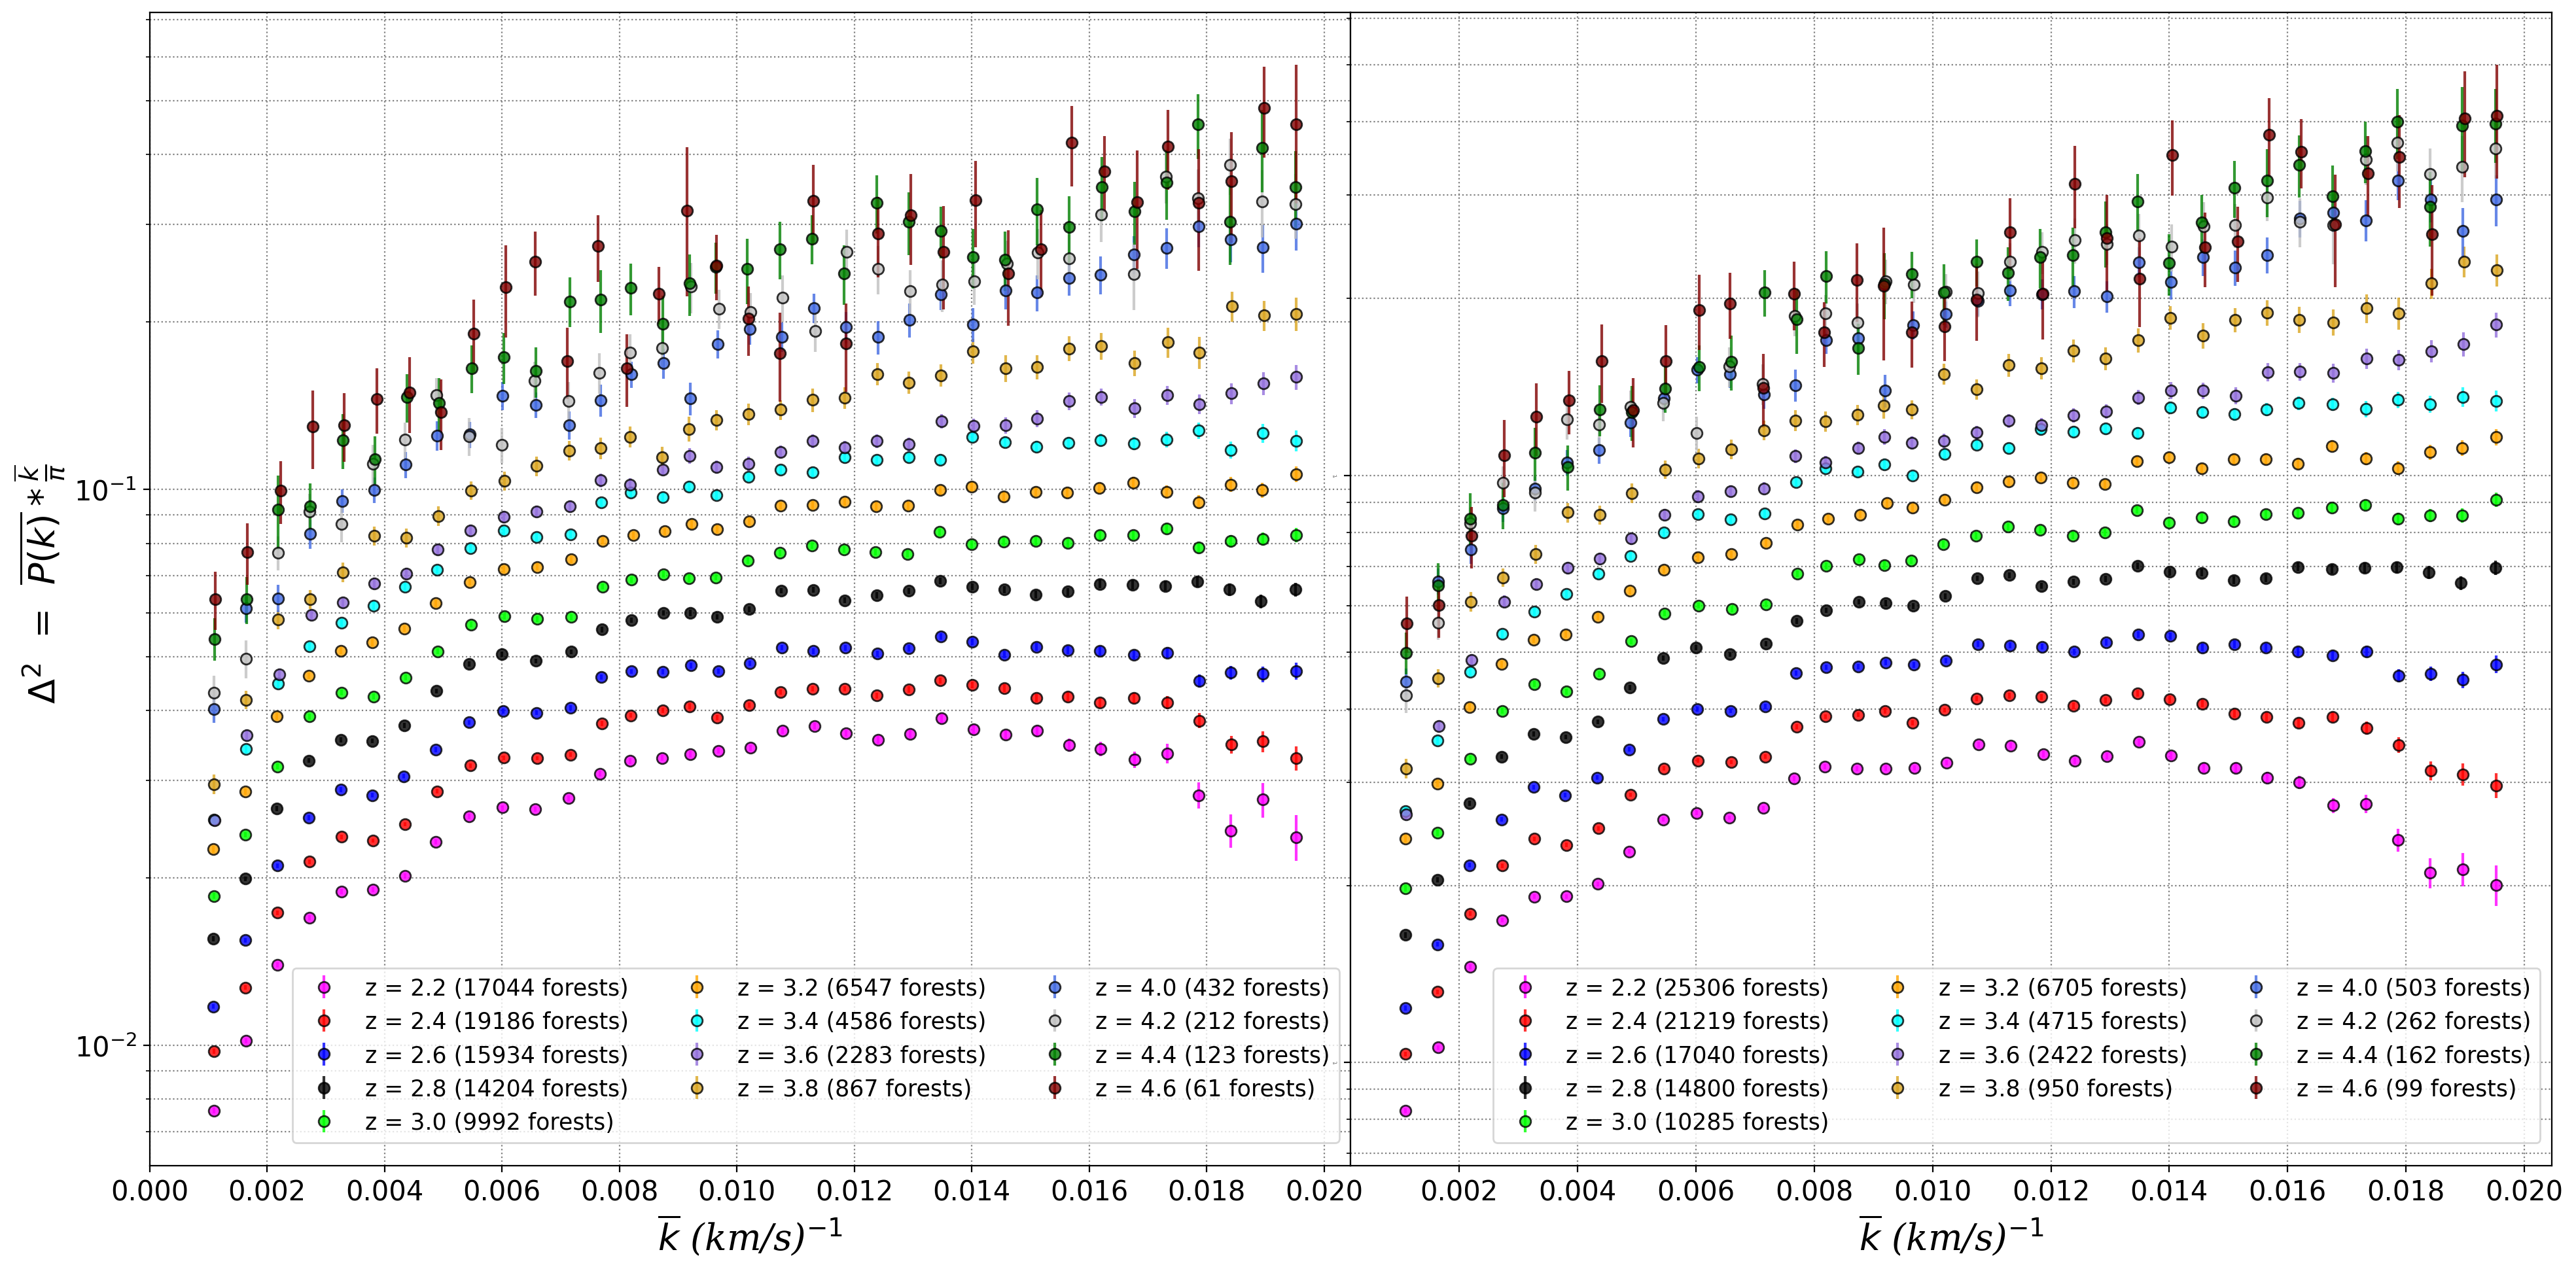

In [168]:
fig = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'wspace':0},figsize=(20,10),dpi=200)

ini = 0


p1d_file = pyfits.open(local_dir+'/P1D_eBOSS_DR14_Standard-v4.fits.gz')
PS = Table.read(p1d_file[1])
chunks = Table.read(p1d_file[2])
plt.subplot(1, 2, 1)
for a in range(13):
    
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
        
    plt.errorbar(k , P , yerr = er, marker = 'o', 
                 label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                 markersize = 6, color = qlor[ini+a],alpha = 0.8, mec = 'k', linestyle = 'none')
                        
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
           family = 'serif', size = 20)          
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 20)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
plt.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=3, fontsize = 12.5)
plt.xticks([0.00, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks([0.01,0.10],fontsize = 15)






p1d_file = pyfits.open(local_dir+'/P1D_eBOSS_DR16_Standard-v4.fits.gz')
PS = Table.read(p1d_file[1])
chunks = Table.read(p1d_file[2])
plt.subplot(1, 2, 2)
for a in range(13):
    
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
        
    plt.errorbar(k , P , yerr = er, marker = 'o', 
                 label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                 markersize = 6, color = qlor[ini+a],alpha = 0.8, mec = 'k', linestyle = 'none')
                                
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 20)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
plt.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=3, fontsize = 12.5)
plt.xticks([0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks([0.01,0.1],fontsize = 0)


#sharey=True

plt.show()